## Reading 30-2 - Big-O Formal Definition

Let's consider the solution from the previous reading:

    5 x iter_max x jter_max + 2 x iter_max
    
We don't know exactly how long it will run, because we don't know iter_max or jter_max.

But let's assume a <b>worst-case scenarior</b> where both are big, and let's replace both with N

    5 x N x N + 2 x N
    
    5 x N^2 + 2 x N

### Improving the Search Time: Pruning the Search Tree

We can often optimize backtracking by <b>pruning the search tree</b>. The idea is to add ”intelligence” to the algorithm so that it will notice as soon as possible if a partial solution cannot be extended to a complete solution. Such optimizations can have a tremendous effect on the efficiency of the search.

> We have already seen another form of pruning the search tree when we used memoization to optimize the recursive trace of the Fibonacci sequence.

### Example Problem - Calculating the number of paths

Let us consider the problem of calculating the number of paths in an n × n grid from the upper-left corner to the lower-right corner such that the path visits each square exactly once. For example, in a 7 × 7 grid, there are 111,712 such paths.

One of the paths is as follows:

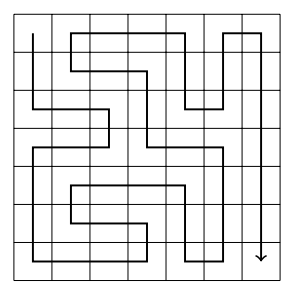

Our design process will be to begin with a straightforward backtracking algorithm, and then optimize it step by step using observations of how the search can be pruned. After each optimization, we observe the running time of the algorithm and the number of recursive calls, so that we clearly see the effect of each optimization on the efficiency of the search.

### Basic algorithm

The first version of the algorithm does not contain any optimizations. We simply use backtracking to generate all possible paths from the upper-left corner to the lower-right corner and count the number of such paths.
<ul>
    <li>For a 7x7 matrix, there are 76 billion recursive calls! This seems not ideal...</li>
</ul>
    
### Optimization 1

In any solution, we first move one step down or right. There are always two paths that are symmetric about the diagonal of the grid after the first step. For example, the following paths are symmetric:

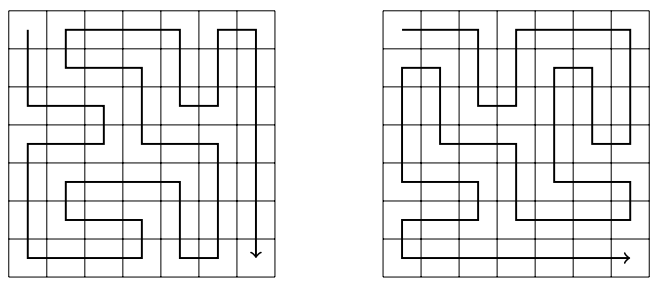

Hence, we can decide that we always first move one step down (or right), and finally multiply the number of solutions by two.
<ul>
    <li>For a 7x7 matrix, we have now cut the number of recursive calls in half to 38 billion. That's <i>some</i> progress!</li>
</ul>

### Optimization 2

If the path reaches the lower-right square before it has visited all other squares of the grid, it is clear that it will not be possible to complete the solution. An example of this is the following path: 

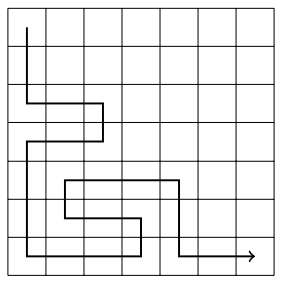

Using this observation, we can terminate the search immediately if we reach the lower-right square too early
<ul>
    <li>For a 7x7 matrix, we have now cut the number of recursive calls to 20 billion. While still significant, with two intelligent observations, we have improved the run time by 74 percent!</li>
</ul>

### Optimization 3

If the path touches a wall and can turn either left or right, the grid splits into two parts that contain unvisited squares. For example, in the following situation, the path can turn either left or right:

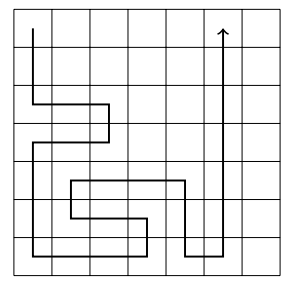

In this case, we cannot visit all squares anymore, so we can terminate the search.
<ul>
    <li>For a 7x7 matrix, we have cut the umber of recursive calls down to 221 million, and we are at a 99.7% improvement.</li>
</ul>

### Optimization 4

The idea of Optimization 3 can be generalized: if the path cannot continue forward but can turn either left or right, the grid splits into two parts that both contain unvisited squares. For example, consider the following path: 

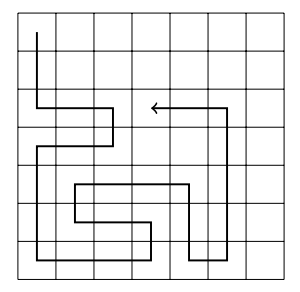

It is clear that we cannot visit all squares anymore, so we can terminate the search. After this optimization, the search is very efficient.
<ul>
    <li>Use a queue to perform breadth-first search and track the previously visited locations. We will review an example of this in lecture!</li>
    <li>For a 7x7 matrix, we have cut the umber of recursive calls down to 69 million, and we are at a 99.91% improvement from the original 76 billion.</li>
    <li>To give perspective, if our optimized runtime took 0.5 seconds, the original run time would be ~550 seconds ( ~9 minutes and 11 seconds ).</li>
</ul>

### Conclusion

This is a normal phenomenon in backtracking, because the search tree is usually large and even simple observations can effectively prune the search. Especially
useful are optimizations that occur during the first steps of the algorithm, i.e., at the top of the search tree.



### <font color = "red">Class Introduction Question #2 - What is the main idea behind "Pruning the Search Tree", and how does this improve Backtracking Algorithms?</a>